In [1]:
import pandas as pd
train = pd.read_csv("train.csv", header=None)
test = pd.read_csv("test.csv", header=None)

In [2]:
import numpy as np
train = np.asarray(train)
test = np.asarray(test)
first_pic = train[8]
pic_label, pic = first_pic[0], first_pic[1:]
print(pic_label)

7


In [3]:
import matplotlib.pyplot as plt
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout, Conv2D, Conv1D


Using TensorFlow backend.


In [5]:
x_train = train[:, 1:785]
y_train = train[:, 0]
y_train = np_utils.to_categorical(y_train)
print(x_train.shape, y_train.shape)

(65000, 784) (65000, 27)


In [6]:
x_test = test[:, 1:785]
y_test = test[:, 0]
y_test = np_utils.to_categorical(y_test)
print(x_test.shape, y_test.shape)

(13000, 784) (13000, 27)


In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((-1, 784))
#x_test = x_test.reshape((-1, 784))

In [8]:
#for i in range(x_train.shape[0]):
#    for j in range(x_train.shape[1]):
#        x_train[i,j] = 1 if x_train[i,j] >= 0.7 else 0
#for i in range(x_test.shape[0]):
#    for j in range(x_test.shape[1]):
#        x_test[i,j] = 1 if x_test[i,j] >= 0.7 else 0

In [9]:
#x_train = x_train.reshape((-1, 784))
#x_test = x_test.reshape((-1, 784))
#np.savetxt('train_x_new.csv', x_train, fmt = '%d')
#np.savetxt('test_x_new.csv', x_test, fmt = '%d')

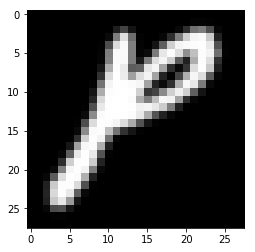

(13000, 28, 28)


In [15]:
x_train = x_train.reshape((-1, 28, 28))
x_test = x_test.reshape((-1, 28, 28))
first_pic = x_test[1]
pic_label, pic = test[1,0], first_pic
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()
print(x_test.shape)

In [99]:
from keras import backend
from keras.layers import LSTM
backend.clear_session()

In [102]:
#N, M = x_train.shape #к-во объектов и признаков в обуч выборке
O = 64
P = 32
K = 16
T = 27
batch_size = 200
learning_rate = 0.001 
training_epochs = 20

In [103]:
tf.reset_default_graph()
model = Sequential()
model.add(LSTM(O, input_shape = (28, 28)))
#model.add(LSTM(O, activation='sigmoid'))
model.add(Dense(P, activation='relu'))
model.add(Dense(K, activation='relu'))
model.add(Dense(T, activation = 'softmax'))
model.compile(optimizer = 'nadam', loss='categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                23808     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 27)                459       
Total params: 26,875
Trainable params: 26,875
Non-trainable params: 0
_________________________________________________________________
None


In [104]:
#for i in range(training_epochs):
#print( 'Epoch: ', i)
model.fit(x_train, y_train, epochs = training_epochs, batch_size = batch_size, validation_data = (x_test, y_test))
#    score = model.evaluate(x_test, y_test, batch_size = batch_size)
#    print('Loss: ', score[0], 'Acc: ', score[1])

Train on 65000 samples, validate on 13000 samples
Epoch 1/20
65000/65000 [==============================] - 18s 270us/step - loss: 1.6179 - acc: 0.5309 - val_loss: 0.8468 - val_acc: 0.7516
Epoch 2/20
65000/65000 [==============================] - 16s 254us/step - loss: 0.6874 - acc: 0.7954 - val_loss: 0.5850 - val_acc: 0.8232
Epoch 3/20
65000/65000 [==============================] - 16s 251us/step - loss: 0.5035 - acc: 0.8458 - val_loss: 0.4636 - val_acc: 0.8539
Epoch 4/20
65000/65000 [==============================] - 17s 256us/step - loss: 0.4149 - acc: 0.8698 - val_loss: 0.4074 - val_acc: 0.8717
Epoch 5/20
65000/65000 [==============================] - 17s 254us/step - loss: 0.3637 - acc: 0.8858 - val_loss: 0.3770 - val_acc: 0.8841
Epoch 6/20
65000/65000 [==============================] - 18s 279us/step - loss: 0.3287 - acc: 0.8952 - val_loss: 0.3750 - val_acc: 0.8822
Epoch 7/20
65000/65000 [==============================] - 19s 292us/step - loss: 0.3018 - acc: 0.9025 - val_loss: 0.

KeyboardInterrupt: 

<br/> sigmoid hard_sigmoid softmax RMSprop 93
<br/> relu sigmoid softmax nadam 97 90.4(test)
<br/> dropout(0.2) O = 1024 P = 256
K = 64
T = 27

In [ ]:
score = model.evaluate(x_test, y_test, batch_size = batch_size)
print('Loss: ', score[0], 'Acc: ', score[1])

</br> Далее посмотрим сколько всего неправильных ответов дала нам наша нейронка на всей тестовой выборке

In [15]:
indexes = []
print('Длинна выборки = ',x_test.shape[0])
for i in range (0, x_test.shape[0]):
    first_pic = x_test[i]
    pic_label, pic = test[i,0], first_pic
    if pic_label != model.predict_classes(x_test[i:i+1]):
        indexes.append(i)
        
print('Кол-во неправильных ответов = ',len(indexes))

Длинна выборки =  13000
Кол-во неправильных ответов =  1213


</br> Ну а теперь посмотрим на каких буквах она ошибалась (возьмем 10)

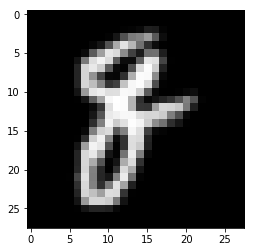

Реальное значение:  q ; Предсказанное:  g


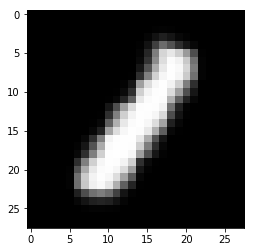

Реальное значение:  l ; Предсказанное:  i


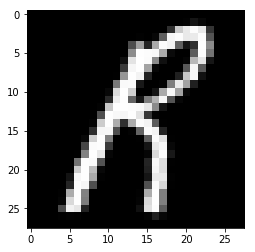

Реальное значение:  r ; Предсказанное:  q


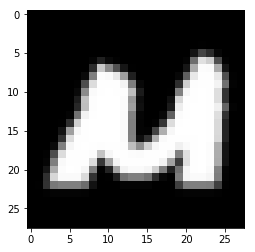

Реальное значение:  m ; Предсказанное:  n


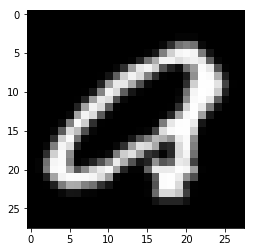

Реальное значение:  q ; Предсказанное:  a


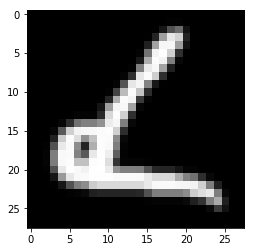

Реальное значение:  d ; Предсказанное:  l


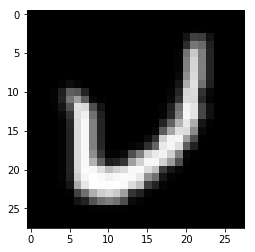

Реальное значение:  v ; Предсказанное:  u


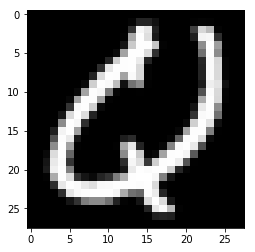

Реальное значение:  q ; Предсказанное:  u


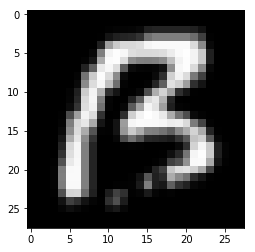

Реальное значение:  b ; Предсказанное:  r


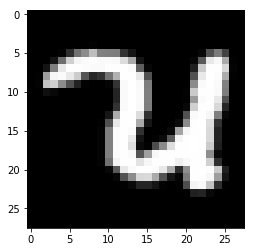

Реальное значение:  u ; Предсказанное:  v


In [16]:
characters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s', 't','u','v','w','x','y','z']
for i in indexes[20:30]:
    first_pic = x_test[i]
    pic_label, pic = test[i,0], first_pic
    plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
    plt.show()
    print('Реальное значение: ', characters[test[i, 0]-1], '; Предсказанное: ', characters[model.predict_classes(x_test[i:i+1])[0]-1])
#print(characters[test[indexes[1:10],0]], characters[for i in model.predict_classes(x_test[indexes[1:10]])])

</br> Хм.. Знаете, я и сам в половине ошибся бы.
</br> Ок, давайте посмотрим какие буквы с какими она путала и сколько раз. Для этого составим табличку (полная таблица в файле df.csv). Столбец - та буква, которая должна быть; строка - та, которая получилась.

In [17]:
errors = pd.DataFrame(index = characters, columns = characters)
errors = errors.fillna(0)

for i in indexes:
    errors[characters[test[i, 0]-1] ][characters[model.predict_classes(x_test[i:i+1])[0]-1]] += 1
    
#for j in range(errors.shape[0]):
#    for i in range(j, errors.shape[1]):
#        errors[characters[i]][characters[j]] += errors[characters[j]][characters[i]]
#        errors[characters[j]][characters[i]] = 0
        
print(errors)
errors.to_csv('df.csv', sep=';')

    a  b   c   d   e   f   g   h   i   j ...   q  r   s  t   u   v  w  x   y  \
a   0  2   0   0   0   0  11   0   0   0 ...   9  7   0  0   0   0  1  3   0   
b   6  0   1   8   2   0  14   7   1   1 ...   4  1   1  0   0   0  0  0   2   
c   4  0   0   0  11   0   0   0   0   0 ...   3  3   0  2   0   0  0  0   0   
d   5  2   0   0   0   0   1   1   0  10 ...   3  0   0  0   0   1  1  0   0   
e  10  2  17   0   0   3   4   0   1   0 ...   1  3   1  5   0   0  0  0   0   
f   0  2   0   0   0   0   2   1   1   1 ...   4  2   1  8   0   0  0  0   0   
g   6  3   2   0   2   1   0   1   0   2 ...  71  0  12  0   1   0  0  1   5   
h   6  4   0   1   0   0   0   0   0   0 ...   0  1   0  0   1   0  0  0   1   
i   0  0   0   0   0   1   0   0   0   4 ...   2  1   0  3   0   0  0  0   2   
j   0  0   0   2   0   0   4   0  21   0 ...   0  0   2  6   0   1  0  0   2   
k   1  0   0   3   1   0   1   5   0   0 ...   1  9   0  2   0   1  2  4   0   
l   0  1   2   2   0   0   0   6  71   1

</br> Как мы видим (в полной табличке) больше всего нейронка путает буквы l с i (174), i с l (62), g с q (62), q с g (72), d с o (25). Это объяснимо тем, что даже печатные буквы в написании очень похожи. Что уж говорить про рукописные. Тем более, что некоторые из них написаны непонятно даже для человека.
<p> Далее посчитаем к-во каждой буквы в выборке

In [18]:
num_count = pd.DataFrame(index = characters, columns = [1])
num_count = num_count.fillna(0)

for i in range (0, x_test.shape[0]):
    pic_label= test[i,0]
    num_count[1][characters[pic_label-1]] += 1
print(num_count)

     1
a  500
b  500
c  500
d  500
e  500
f  500
g  500
h  500
i  500
j  500
k  500
l  500
m  500
n  500
o  500
p  500
q  500
r  500
s  500
t  500
u  500
v  500
w  500
x  500
y  500
z  500


<p> Оказалось, что все гораздо проще и их тут равное к-во. Хорошо, дальше посчитаем долю ошибки при определении каждой буквы. Для этого сложим значения по столбцам нашей таблицы и разделим его на 500.

In [19]:
errors_percent = pd.DataFrame(index = characters, columns = [1], dtype = np.float)
errors_percent = errors_percent.fillna(0)

for i in characters:
    sum_error = 0
    for j in characters:
        sum_error += errors[i][j]
    errors_percent[1][i] = sum_error / 500.
print(errors_percent)

       1
a  0.148
b  0.042
c  0.054
d  0.068
e  0.048
f  0.060
g  0.186
h  0.080
i  0.208
j  0.086
k  0.046
l  0.340
m  0.046
n  0.062
o  0.036
p  0.064
q  0.234
r  0.084
s  0.040
t  0.090
u  0.046
v  0.130
w  0.050
x  0.050
y  0.072
z  0.056


<p> L и i оказались самыми сложными буквами. Ну впрочем это легко объяснить исходя из их написания. Их действительно много с чем можно перепутать. Особенно если подчерк у человека такой себе) Соответственно, модель лучше распознает такие буквы, как z,m,s,f потому что их сложно с чем-то перепутать.
<p> По поводу фамилий: 
    <br><b>Сомов</b> - S. Точность детекции 0.952. Чаще всего нейронка путает ее с буквами g (8 раз) и j (4 раза). <br><b>Логинов</b> - L. Точность детекции 0.592. Эх, обидно. Чаще всего путает с i (174 раза) и c (4 раза). Ох уж эта i :)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
train_y = train[:,0]
train_x = train[:, 0:]

test_y = test[:, 0]
test_x = test[:, 0:]

<p> Теперь попробуем получить такую же точность на Random Forest

In [33]:
model = RandomForestClassifier(n_estimators=19, max_depth=19).fit(train_x, train_y)
acc = accuracy_score(test_y, model.predict(test_x))
print('Глубина дерева: : ', 19, '; К-во деревьев: ', 19,'; Accuracy: ',acc)

Глубина дерева: :  19 ; К-во деревьев:  19 ; Accuracy:  0.9004615384615384


<p> Для подбора параметров использовали старый добрый брутфорс